# Project: Investigate a Dataset (IMDB Movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset contains some information on the movies that have been released from 1960 to 2015. It contains data such as the cast, budget, revenue, popularity, genre, release date and so on. We are going to be exploring the data to see if we can gain any insight from it.

> Some of the questions we will be asking include:
What are the most common genres?  
Who are the most casted actors?  
what are the relationships between attributes?



## Data Wrangling

In [146]:
# importing the necessary packages to work with

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting our plots to show within the notebook

%matplotlib inline

In [147]:
# Loading the Movie dataset to work with

movie_df = pd.read_csv('tmdb-movies.csv')

#### Exploring the data

In [148]:
# checking the shape to determine how many rows and columns are there

movie_df.shape

(10866, 21)

In [149]:
# checking the head of the dataset 

movie_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [150]:
# checkig the tail of the dataset

movie_df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


> **Note:**
It is noticed here that some values in the budget and revenue columns have the value of zero. This is an abnormality. We shall be taking such values to be null and counted with the null values in the dataset.

# 

In [151]:
# checking the info on the dataset

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [152]:
# Checking for null values

movie_df[movie_df.isnull().any(axis=1)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
18,150689,tt1661199,5.556818,95000000,542351353,Cinderella,Lily James|Cate Blanchett|Richard Madden|Helen...,NaN,Kenneth Branagh,Midnight is just the beginning.,...,"When her father unexpectedly passes away, youn...",112,Romance|Fantasy|Family|Drama,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,3/12/15,1495,6.8,2015,8.739996e+07,4.989630e+08
21,307081,tt1798684,5.337064,30000000,91709827,Southpaw,Jake Gyllenhaal|Rachel McAdams|Forest Whitaker...,NaN,Antoine Fuqua,Believe in Hope.,...,"Billy ""The Great"" Hope, the reigning junior mi...",123,Action|Drama,Escape Artists|Riche-Ludwig Productions,6/15/15,1386,7.3,2015,2.759999e+07,8.437300e+07
26,214756,tt2637276,4.564549,68000000,215863606,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,NaN,Seth MacFarlane,"Ted is Coming, Again.",...,Newlywed couple Ted and Tami-Lynn want to have...,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,6/25/15,1666,6.3,2015,6.255997e+07,1.985944e+08
32,254470,tt2848292,3.877764,29000000,287506194,Pitch Perfect 2,Anna Kendrick|Rebel Wilson|Hailee Steinfeld|Br...,NaN,Elizabeth Banks,We're back pitches,...,"The Bellas are back, and they are better than ...",115,Comedy|Music,Universal Pictures|Gold Circle Films|Brownston...,5/7/15,1264,6.8,2015,2.667999e+07,2.645056e+08
33,296098,tt3682448,3.648210,40000000,162610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,NaN,Steven Spielberg,"In the shadow of war, one man showed the world...",...,"During the Cold War, the Soviet Union captures...",141,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,10/15/15,1638,7.1,2015,3.679998e+07,1.496016e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


> **Note:**
From the above, we can see that there are missing values in some of the columns

In [153]:
# checking for duplicated values

movie_df[movie_df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


> There is only one duplicated row, so we can remove it.

### Cleaning the Dataset

In [154]:
# Removing the duplicate row

movie_df.drop_duplicates(inplace=True)

In [155]:
# Checking if the duplicate row has been removed
movie_df[movie_df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [156]:
# removing the columns that are not needed.

movie_df.drop(columns=['imdb_id','homepage', 'tagline', 'overview','keywords', 'production_companies', 'release_date'], inplace = True)

In [157]:
# checking the new info

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  int64  
 3   revenue         10865 non-null  int64  
 4   original_title  10865 non-null  object 
 5   cast            10789 non-null  object 
 6   director        10821 non-null  object 
 7   runtime         10865 non-null  int64  
 8   genres          10842 non-null  object 
 9   vote_count      10865 non-null  int64  
 10  vote_average    10865 non-null  float64
 11  release_year    10865 non-null  int64  
 12  budget_adj      10865 non-null  float64
 13  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [158]:
# checking rows with a budget value of zero

movie_df.query('budget == 0')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,425,6.4,2015,0.0,2.700677e+07
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,474,6.2,2015,0.0,2.056620e+07
72,284289,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,81,5.5,2015,0.0,4.222338e+04
74,347096,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,27,5.1,2015,0.0,0.000000e+00
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Gerald Thomas,87,Comedy,13,7.0,1966,0.0,0.000000e+00
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,11,7.4,1966,0.0,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,20,5.7,1966,0.0,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,11,6.5,1966,0.0,0.000000e+00


> We can see from the above table that the number of rows with zero budget values are 5696. This is a whole lot and can adversely affect our analysis.

In [159]:
# replacing the zero values with null so that it can easily be dropped.

movie_df.loc[movie_df["budget"] == 0, "budget"] = None
movie_df.loc[movie_df["revenue"] == 0, "revenue"] = None
movie_df.loc[movie_df["runtime"] == 0, "runtime"] = None

In [160]:
# checking to confirm the change

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          5169 non-null   float64
 3   revenue         4849 non-null   float64
 4   original_title  10865 non-null  object 
 5   cast            10789 non-null  object 
 6   director        10821 non-null  object 
 7   runtime         10834 non-null  float64
 8   genres          10842 non-null  object 
 9   vote_count      10865 non-null  int64  
 10  vote_average    10865 non-null  float64
 11  release_year    10865 non-null  int64  
 12  budget_adj      10865 non-null  float64
 13  revenue_adj     10865 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 1.2+ MB


In [161]:
# Dropping the null values

movie_df.dropna(inplace=True)

In [162]:
# checking if there are still any null values

movie_df.isnull().any()

id                False
popularity        False
budget            False
revenue           False
original_title    False
cast              False
director          False
runtime           False
genres            False
vote_count        False
vote_average      False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

In [163]:
movie_df.shape

(3849, 14)

## EDA

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

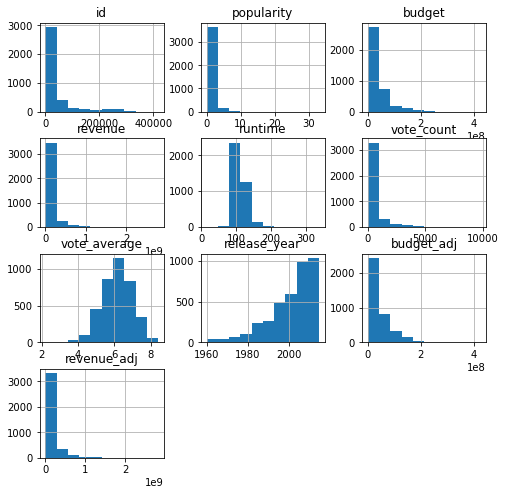

In [164]:
movie_df.hist(figsize=(8,8))

#### what year had the most released movies?

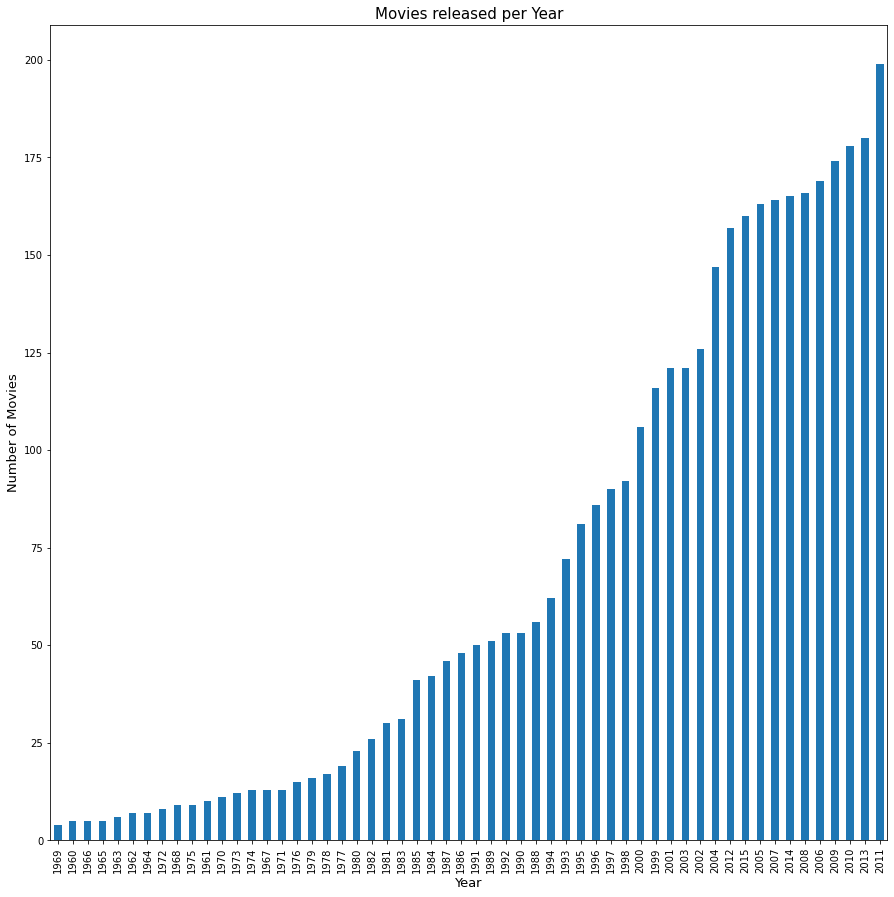

In [165]:
years = movie_df['release_year'].value_counts(ascending=True)
years.plot(kind = 'bar',figsize=(15,15))
plt.title('Movies released per Year', fontsize=15)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Number of Movies', fontsize= 13)
plt.show()

#### what year has the highest total budget?

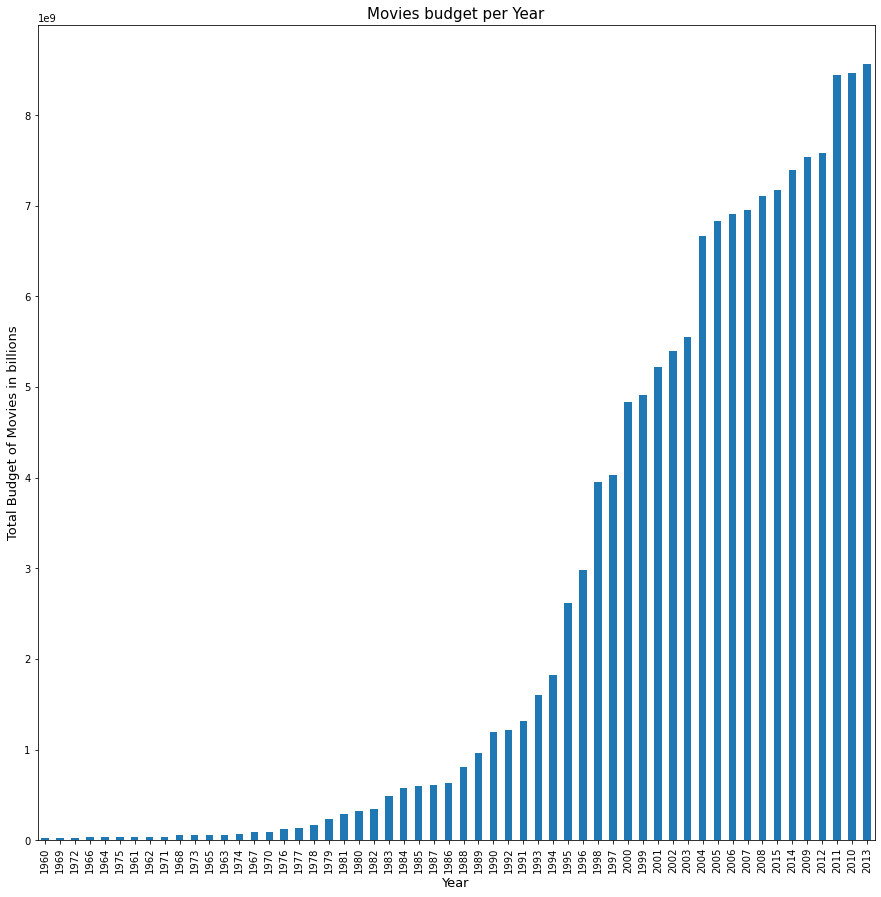

In [166]:
year_budget = movie_df.groupby('release_year')['budget'].sum().to_frame()
year_budget.sort_values('budget', inplace=True)
year_budget.plot(kind = 'bar', figsize=(15,15), legend=False)
plt.title('Movies budget per Year', fontsize=15)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Total Budget of Movies in billions', fontsize= 13)
plt.show()

> The year with the highestbudget is 2013, but is not the year with the higest movies released. 

In [167]:
# a function to split,count and plot a chart of how many items are present in a column

def plotitems(df_column):
    item_list = []
    item_dict = {}
    
    for i in movie_df[df_column]: # iterates through each item in the column
        lis = i.split('|') # splits the items into a list
        item_list += lis  # adds all the items to the main list
    
    for j in item_list: # iterating through the main list
        if j in item_dict: #checking to see if the item is already in the dictionary
            item_dict[j] += 1 # adds one if true
        else:
            item_dict[j] = 1 # sets to one if false

    # creating a dataframe for the items

    item_df = pd.DataFrame(list(item_dict.items()), columns = [df_column,'Occurrence'])
    item_df.sort_values('Occurrence', inplace=True)
    item_df = item_df.tail(20)
    
    plt.barh(item_df[df_column],item_df['Occurrence'])
    plt.title('Most popular '+ df_column)
    plt.ylabel(df_column)
    plt.xlabel('Number of occurence')
    plt.show()

# creating a function that would plot the scatter plot between two variables

def plotattr(x, y):
    plt.scatter(x=movie_df[x], y=movie_df[y])
    plt.title('relationship between '+ x + ' and '+ y)
    plt.ylabel(y )
    plt.xlabel(x )
    plt.show()

#### Which genres occur the most over the years?

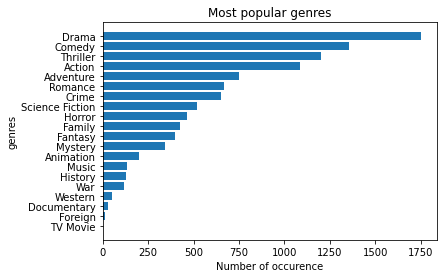

In [168]:
# checking the most popular genres
plotitems('genres')

>  
From here, we can see that Drama is the most occurring genre, followed by Comedy, Thriller and Action.
Tv Movie is the least occuring

#### Which actor was most casted?

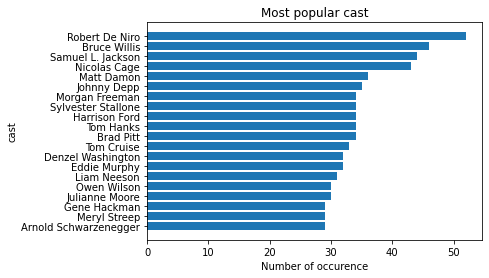

In [169]:
# checking to see the most casted actors
plotitems('cast')

> From this, we can see that more movie have been released starring Robert De Niro than any other actors. Bruce Willis, Samuel L Jackson, Nicholas cage and Matt Damon follow respectively.

# 

####  Is there any relationship between budget and revenue

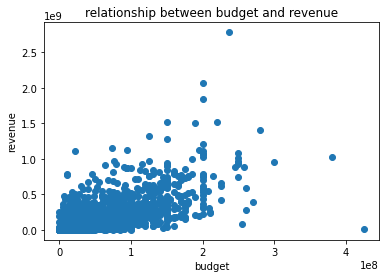

In [170]:
# we want to check if there is any relationship between budget and revenue

plotattr('budget', 'revenue')

> We can see there is a slight positive correlation between budget and revenue. The revenue tends to be high when budget is high except for some few outliers

#### is there any relationship between budget and runtime?

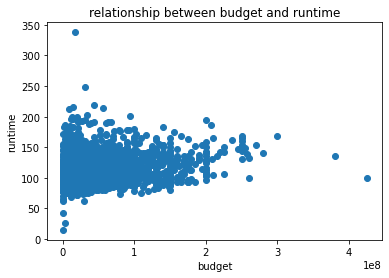

In [171]:
# we want to check if there is any relationship between budget and runtime
plotattr('budget', 'runtime')

> There is no correlation between budget and runtime. The scatterplot shows that the runtime remains almost the same across the budget. Hence, they are independent of each other and one can not easily affect or determine the outcome of the other.


#### is there any correlation between popularity and runtime?

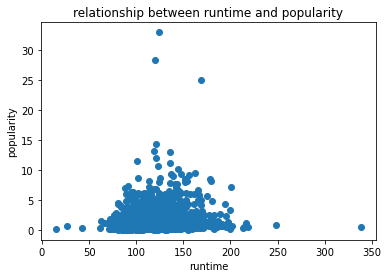

In [172]:
# we want to check if there is any relationship between popularity and runtime

plotattr('runtime', 'popularity')

> Here, we can see that, there is also no correlation between the runtime and popularity. The scatter plot shows that the popularity tends to be the same when runtime increases and only some outliers defy that.

#### is there any correlation between popularity and vote count?

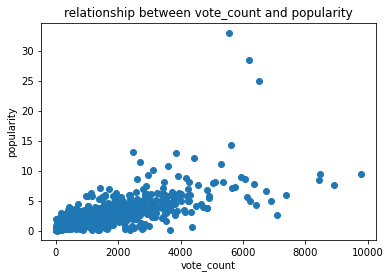

In [173]:
# we want to check if there is any relationship between popularity and vote count
plotattr('vote_count', 'popularity')

> There is also some correlation between the vote count and the popularity. Though not a strong corelation, the vote count can help in determining the popularity of the movie.

### Conclusions

> The most common genres were Drama, Comedy, Thriller, Action, and Adventure.            
> The most casted actors included Robert De Niro, Bruce Willis, Samuel L Jackson, Nicolas Cage and Matt Damon.        
> There appears to be a slightly positive correlation between the budget and the revenue. This means that to some extent, when the budget increases, the revenue increases. For a movie with a very high revenue, then a lot of moey must have gone into the production. <br>There is no correlation between the budget and the runtime. A very high budget does not guarantee a long movie and vice versa. The runtime is totally independent of the budget.<br>Also, there is no correlation between the runtime and the popularity. A longer movie does not mean it will gain popularity. They are totally independent of each other. <br>The correlation between the vote_count and popularity is slightly positive. There is a chance of getting popular if the vote count is high.<br><br>
The quantitative data are all skewed and do not follow the normal distribution.<br>
Also, that a year has the highest the higest number of movies produced does not equal to it being the year with the highest budget. We can see that clearly from bar charts above.

### Limitations

> The major limitation to the data is the presence of null and zero values in the budget column. The removal of about 5000 rows would go on to affect the outcome of the analysis. 